In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GroupKFold
import lightgbm as lgb

In [ ]:
#Importing
df = pd.read_csv("/content/drive/MyDrive/data (1).csv")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

NA Values

In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the count of NaN values for each column
print(df.isna().sum())

# Reset display options to their default values if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Summary stats

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


histbins

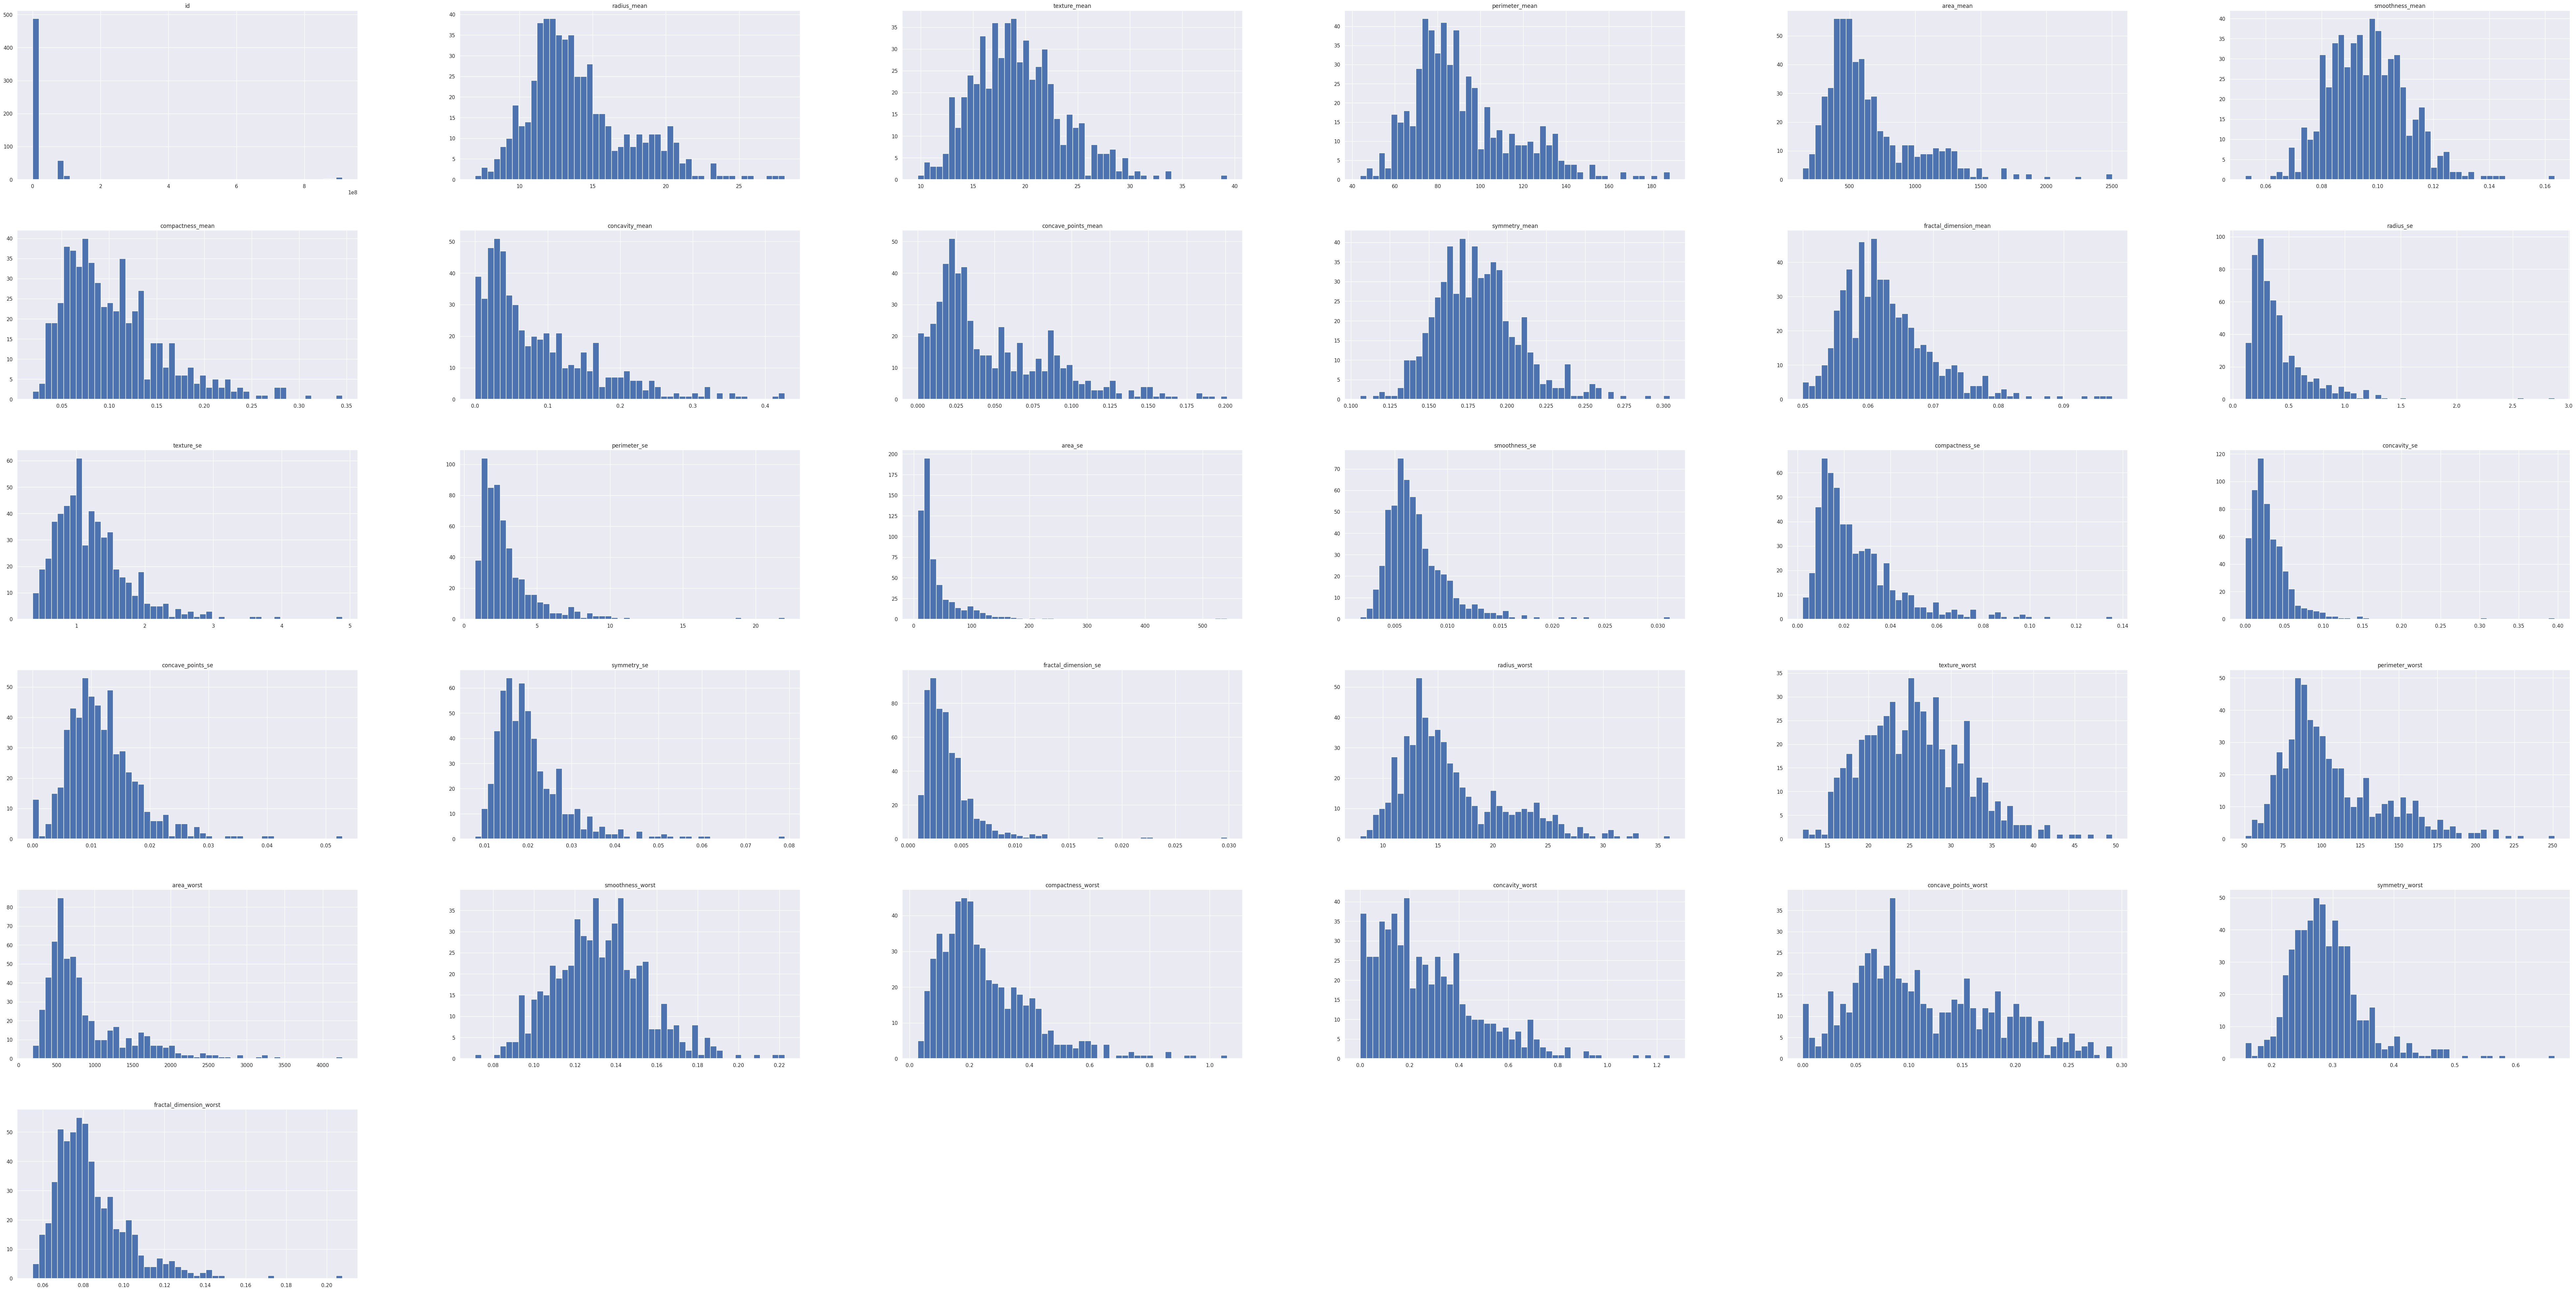

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Identify columns without inf or -inf values
finite_columns = ~df.isin([np.inf, -np.inf]).any()

# Filter the DataFrame based on the identified columns
df_no_inf = df.loc[:, finite_columns]

# Retry the histogram
df_no_inf.hist(bins=50, figsize=(100, 50))

# Show the plot
plt.show()


outliers

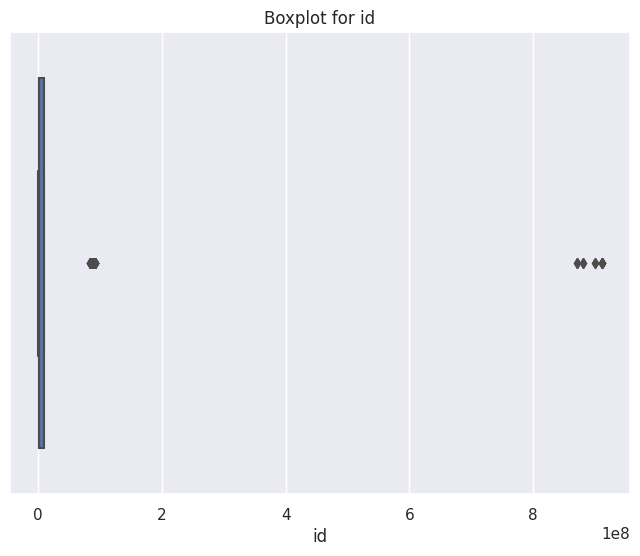

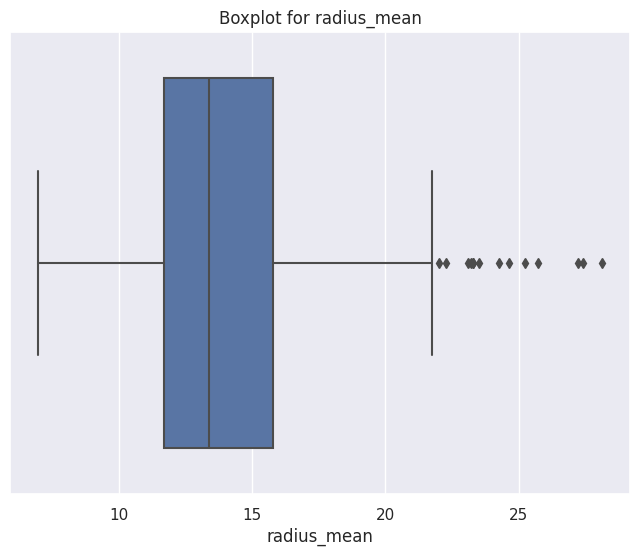

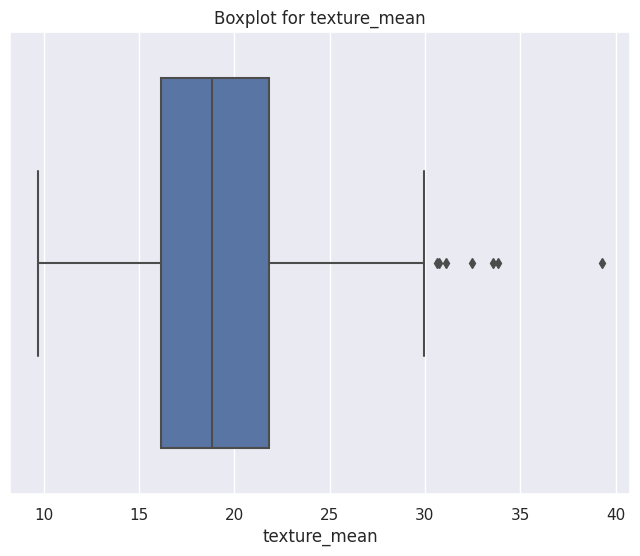

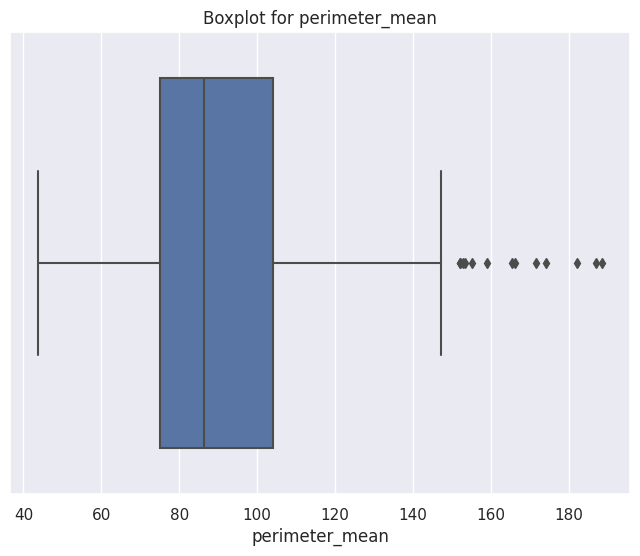

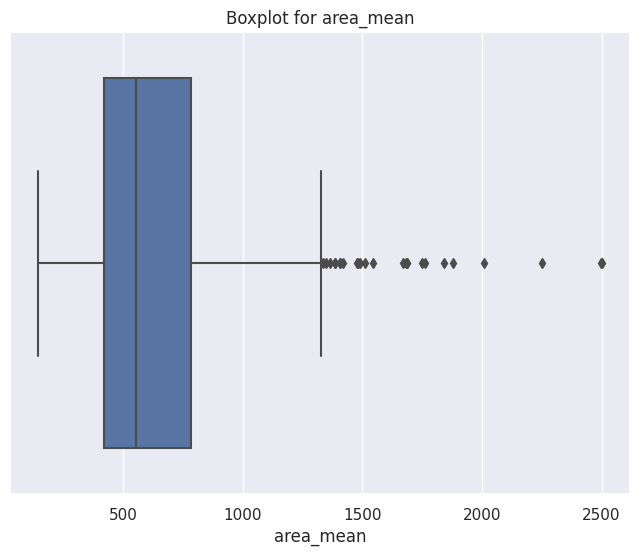

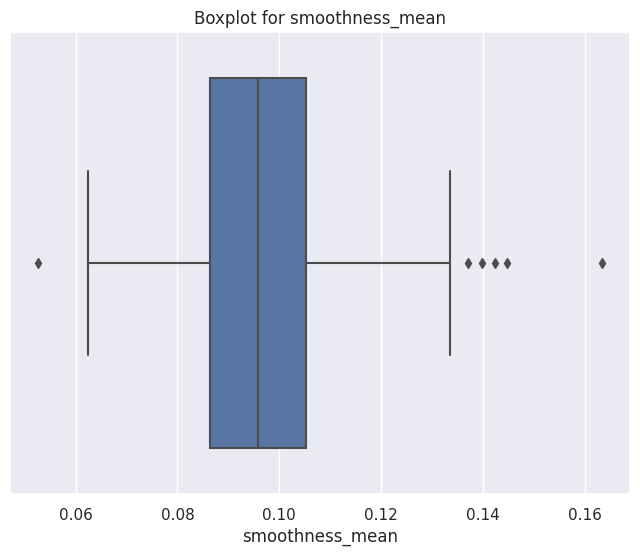

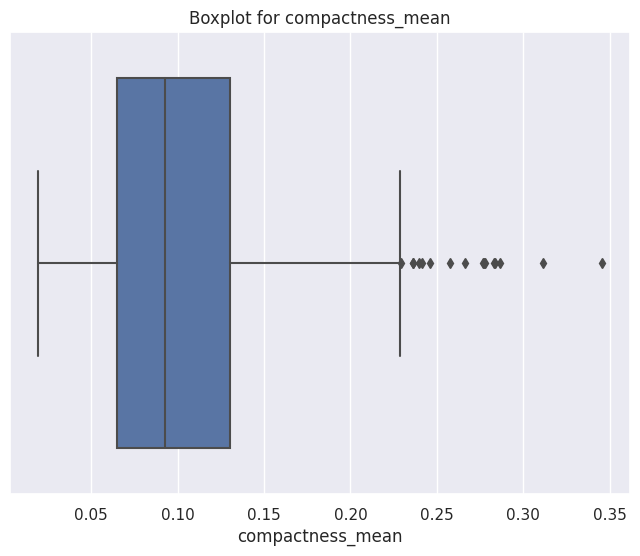

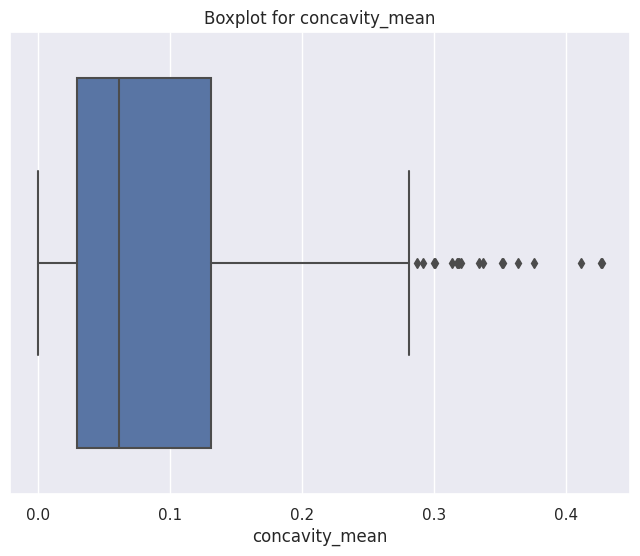

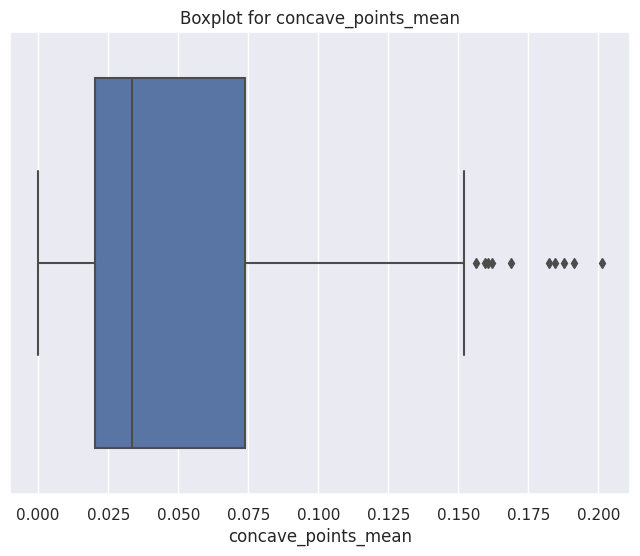

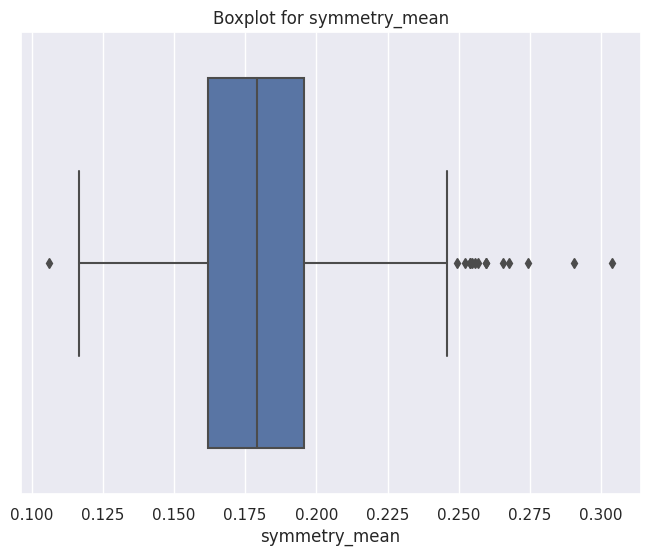

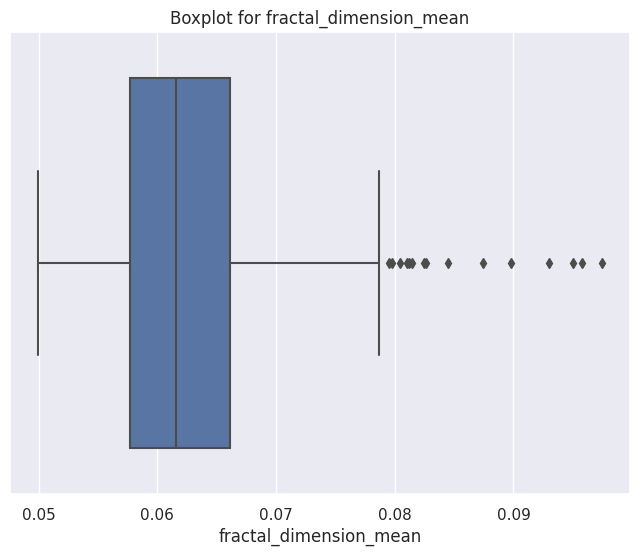

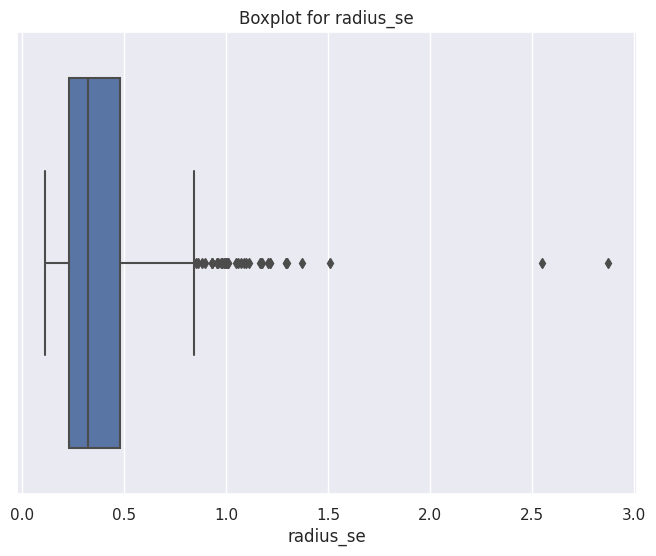

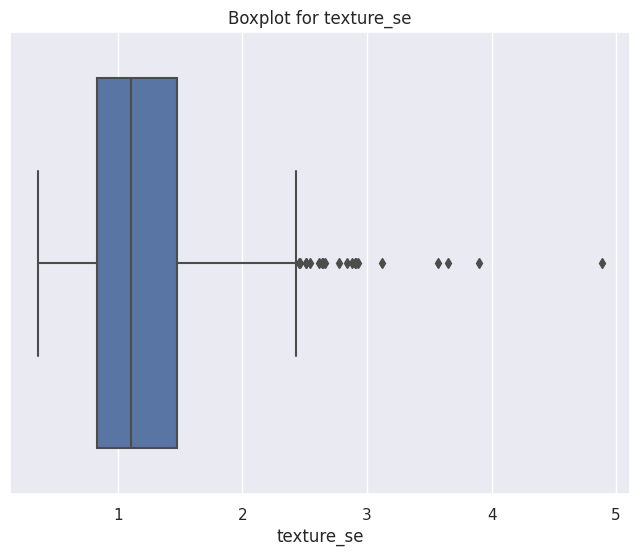

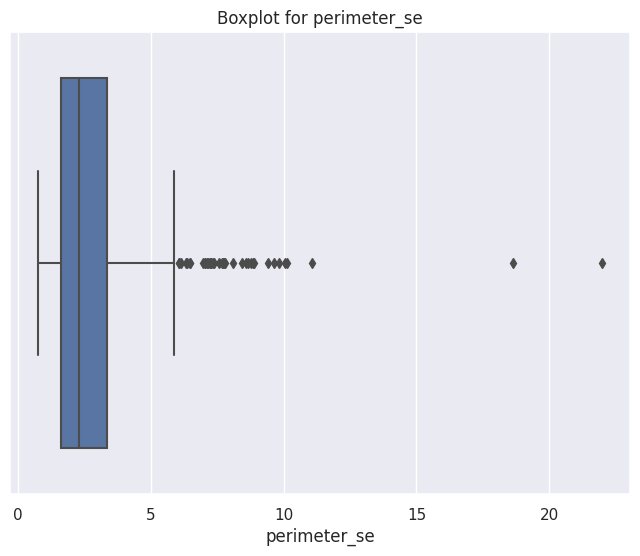

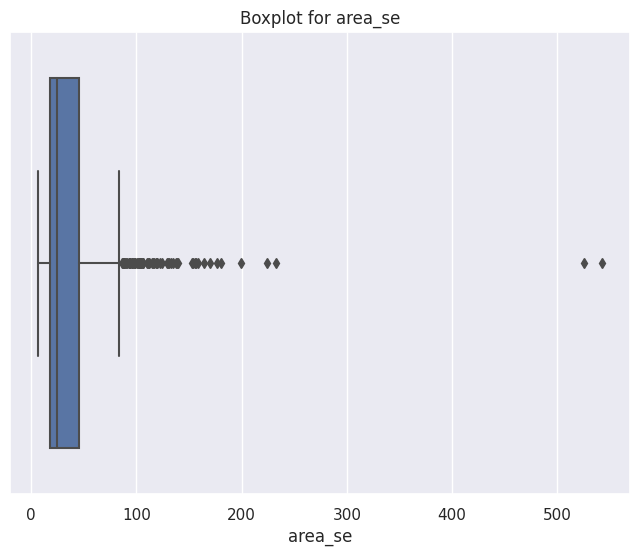

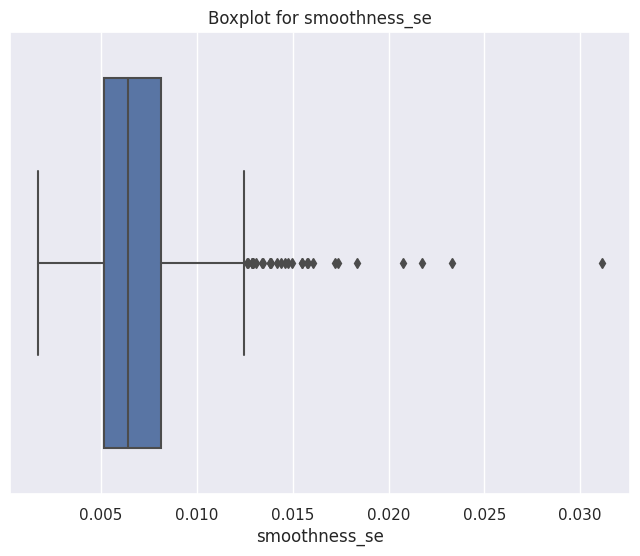

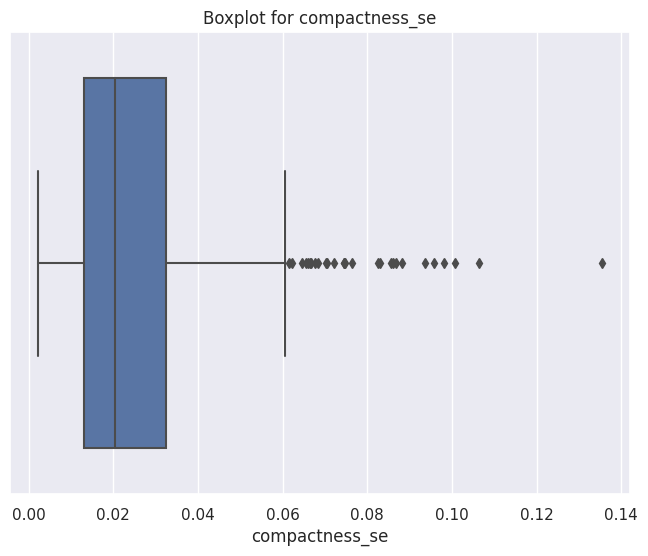

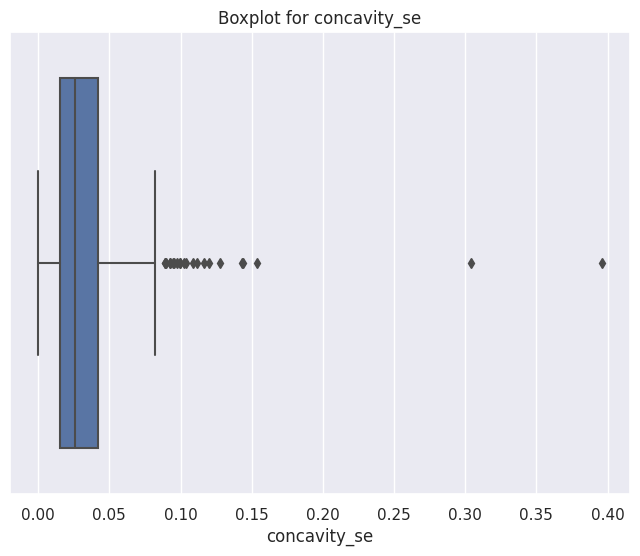

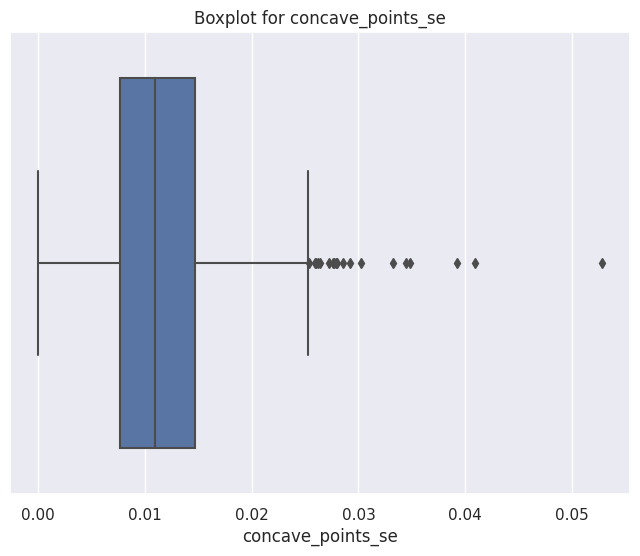

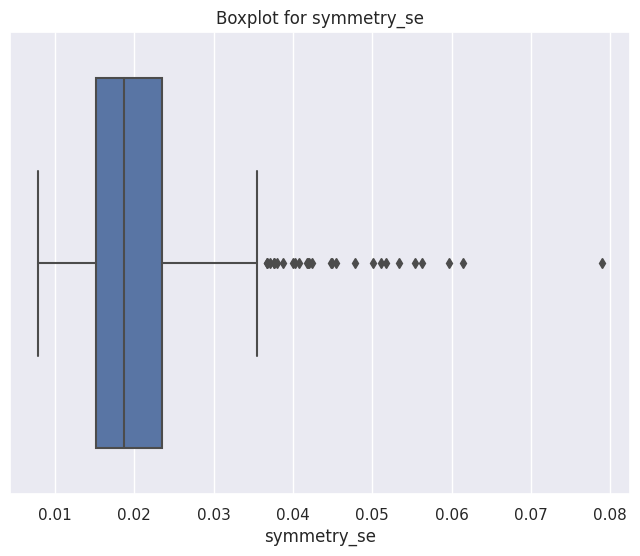

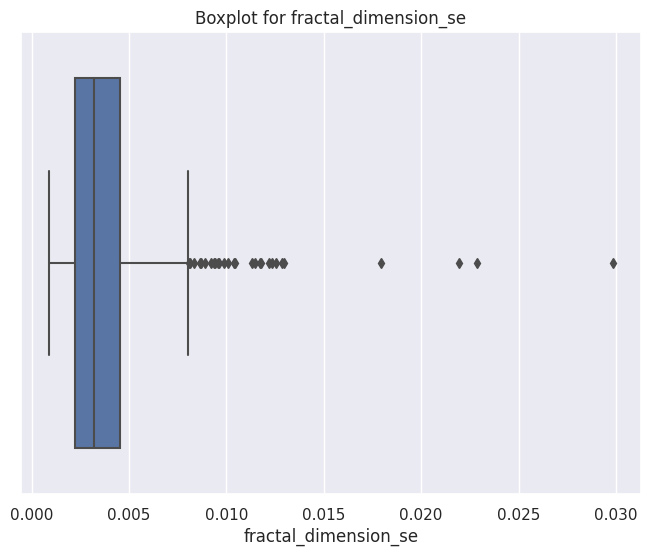

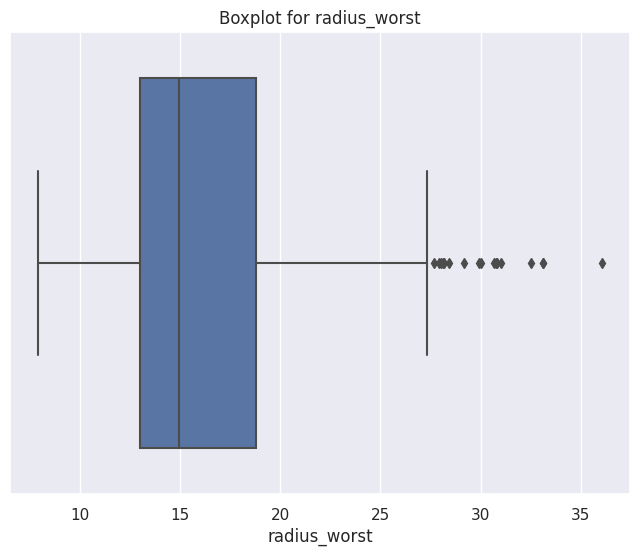

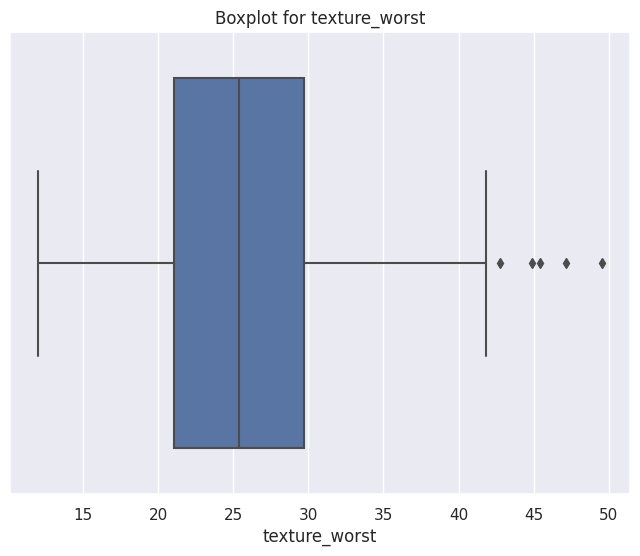

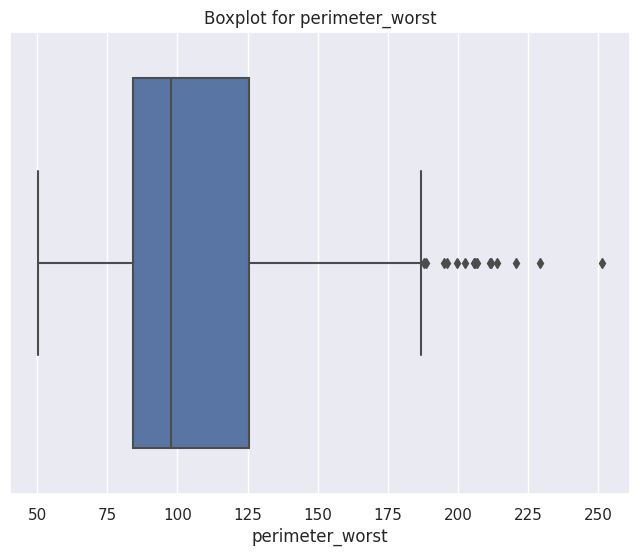

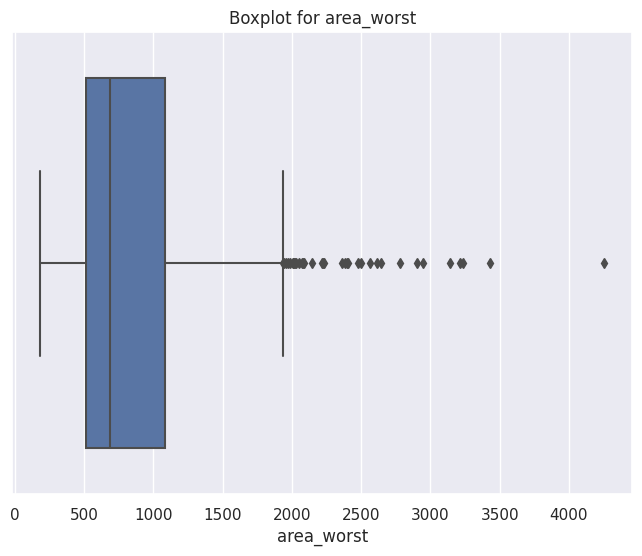

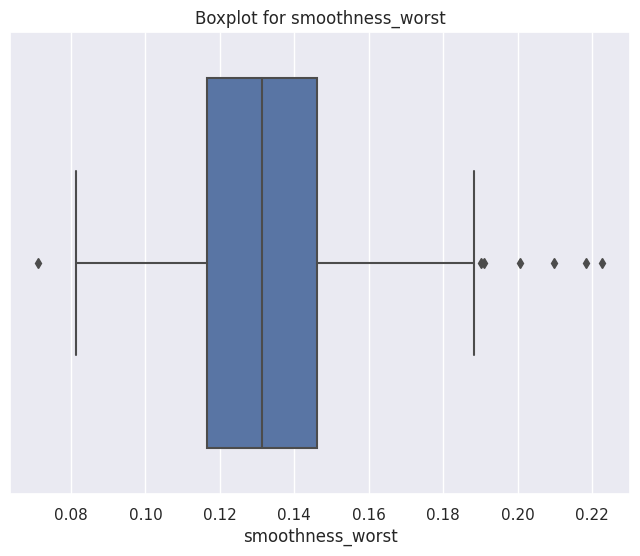

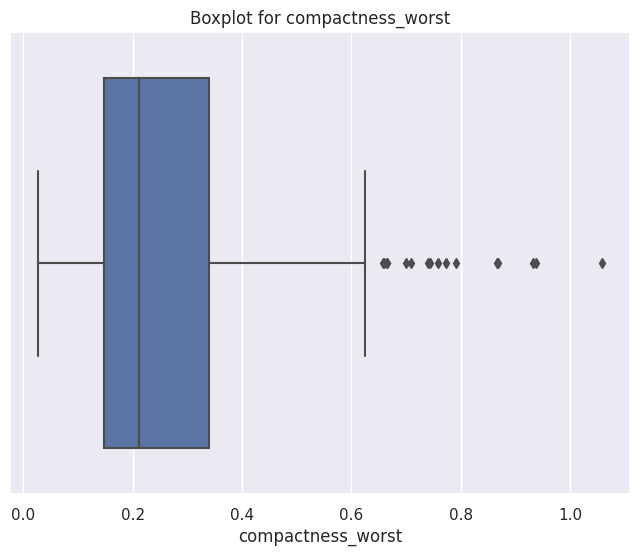

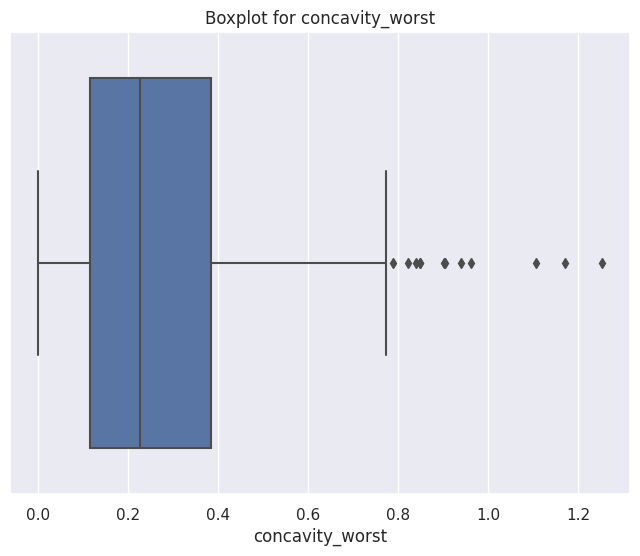

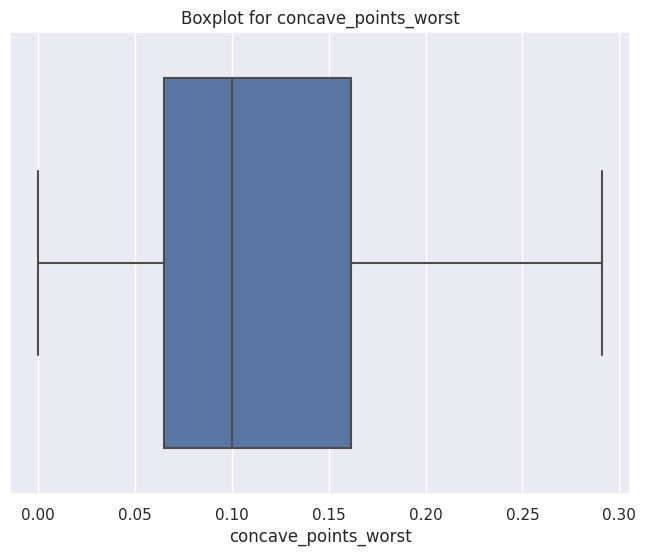

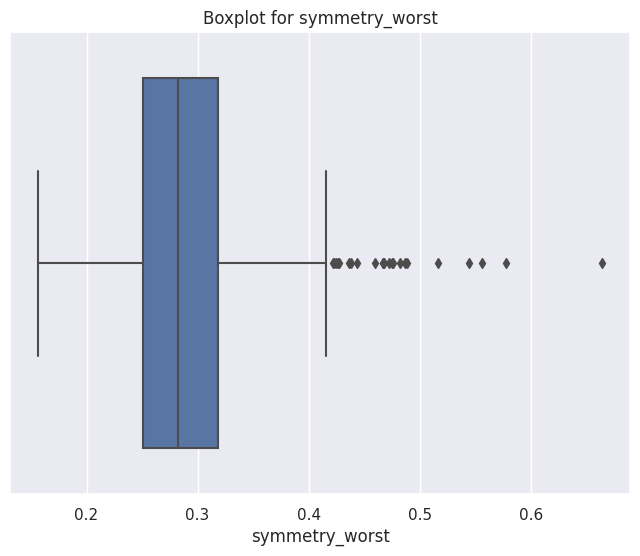

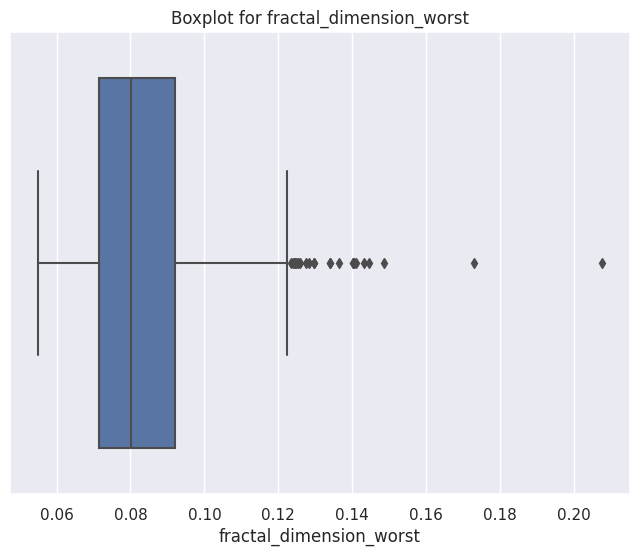

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming your DataFrame is named df
# Replace df with the actual name of your DataFrame

# Create boxplots for each numeric column
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


Distribution

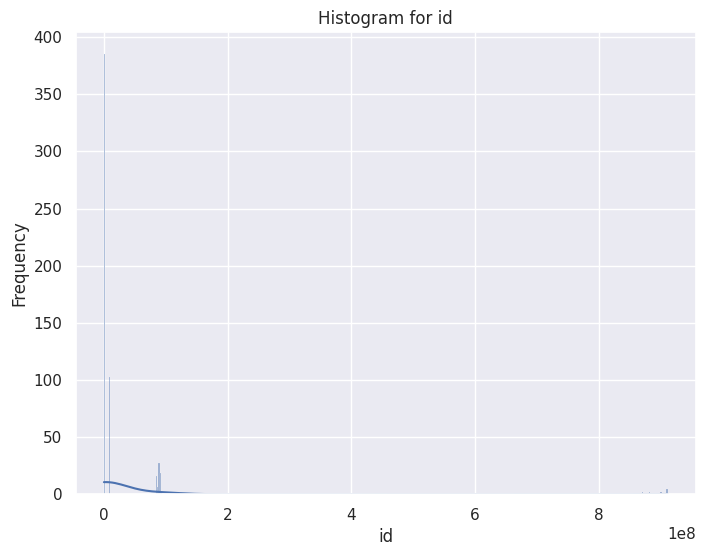

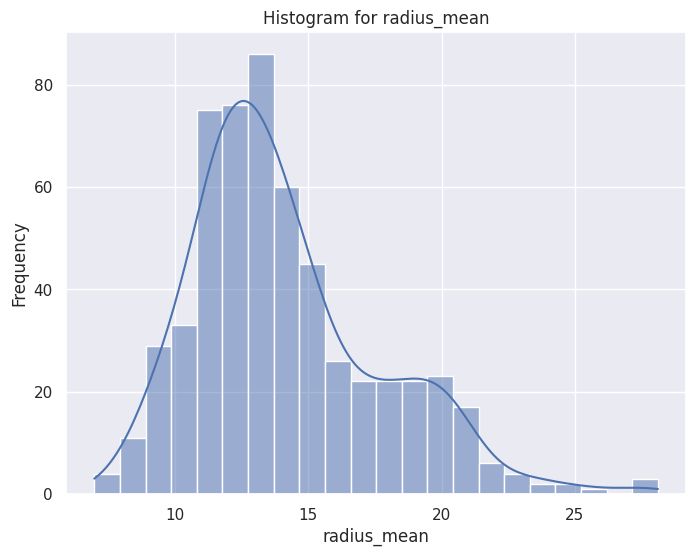

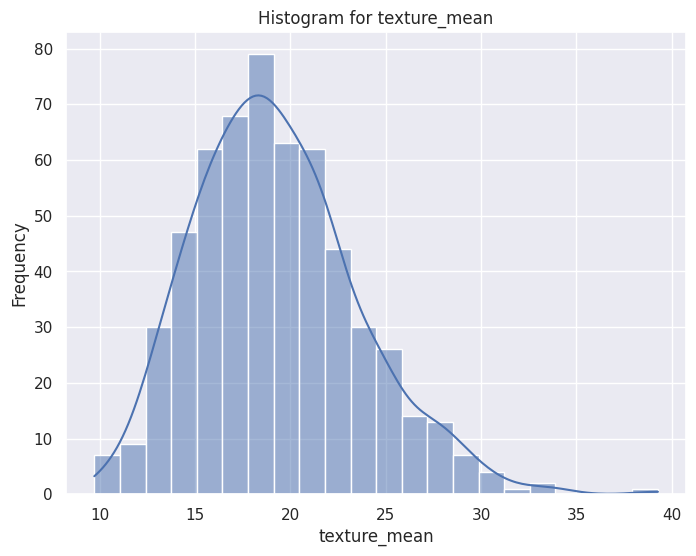

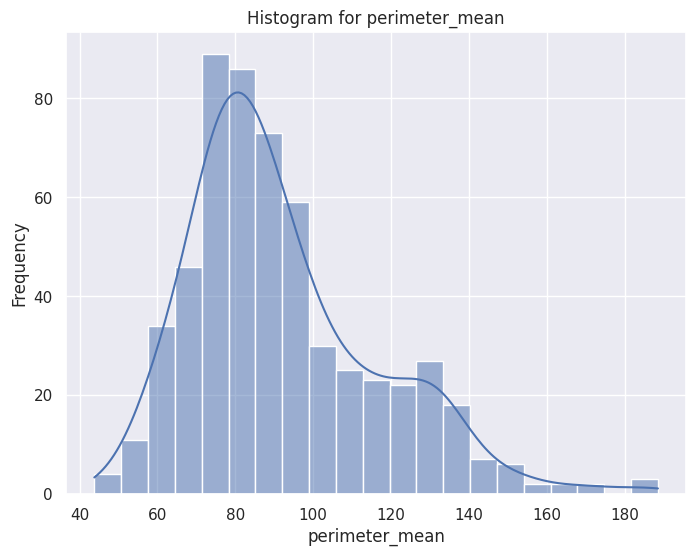

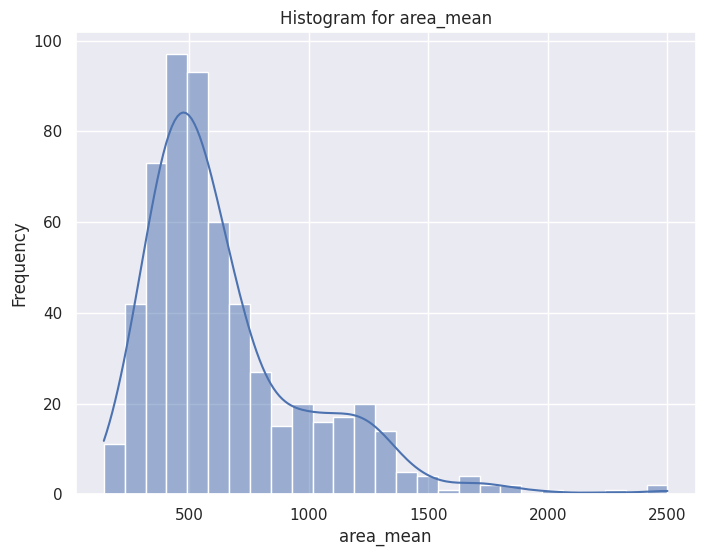

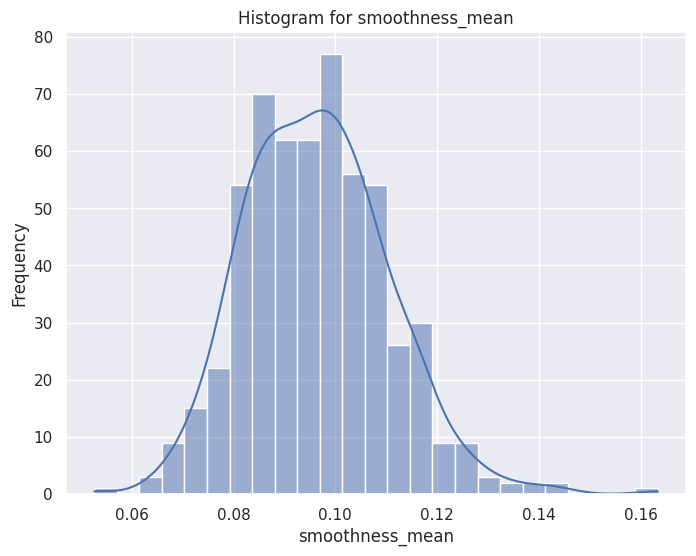

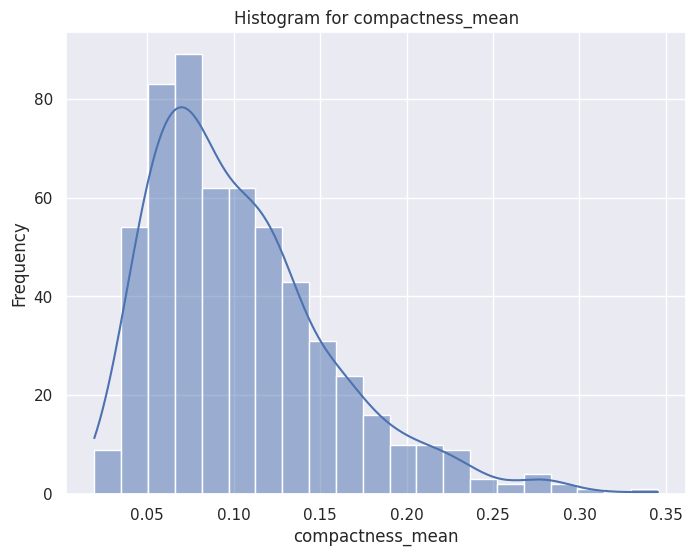

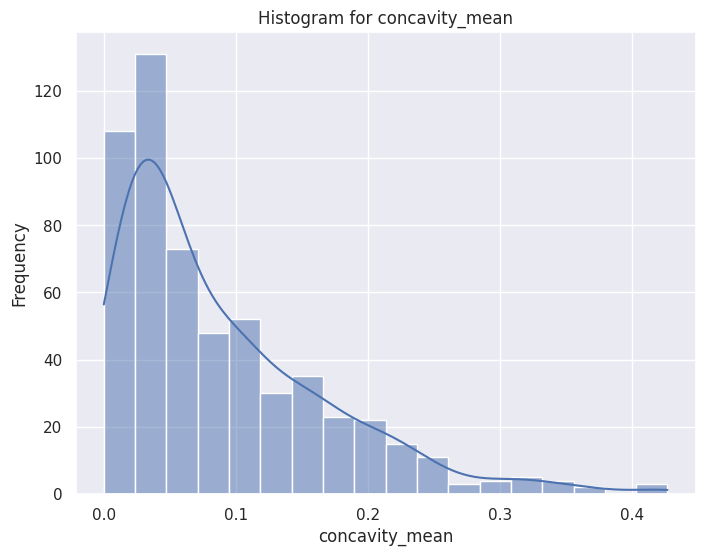

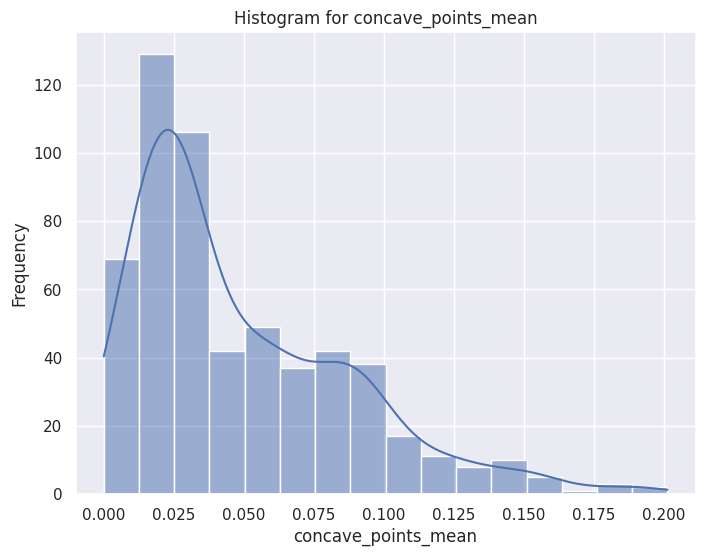

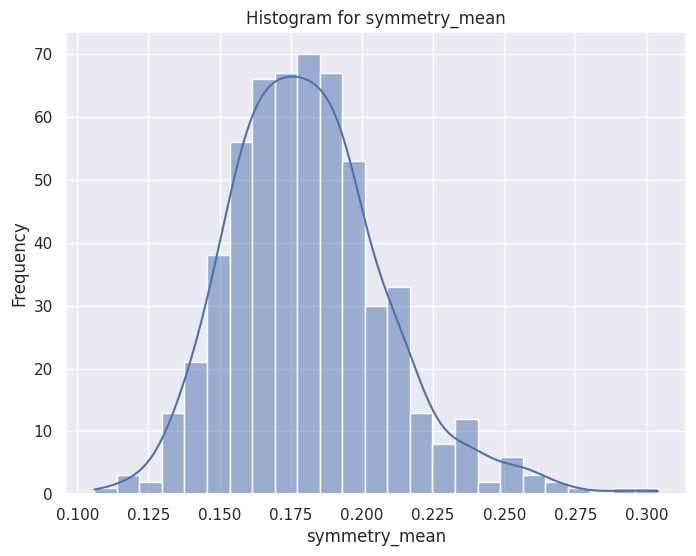

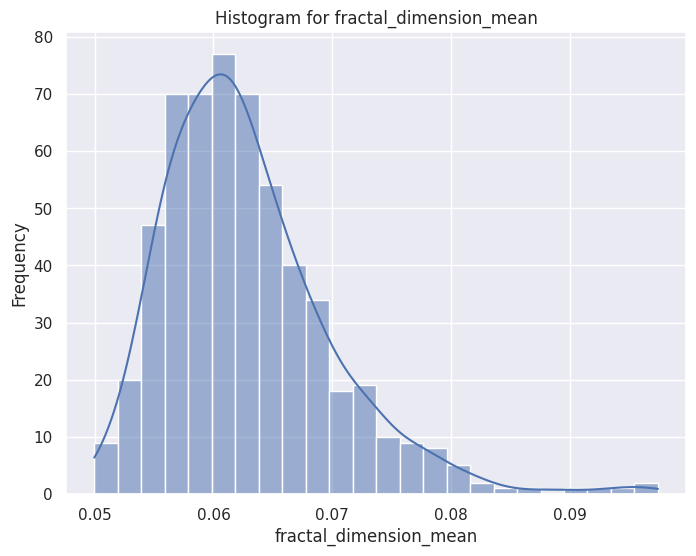

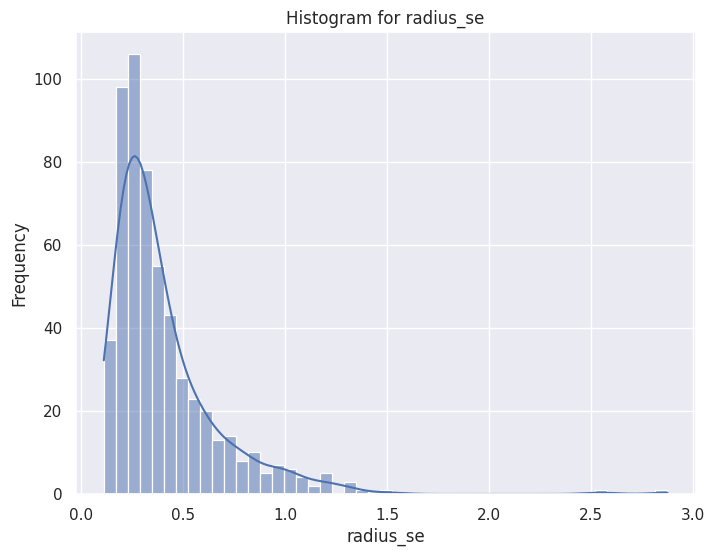

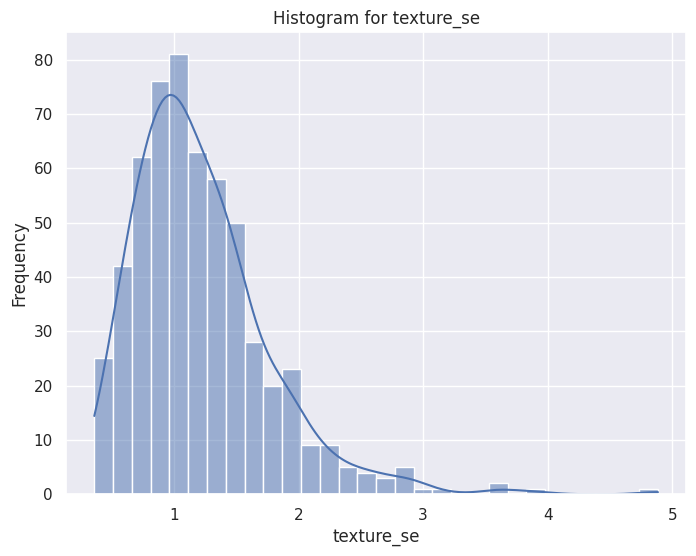

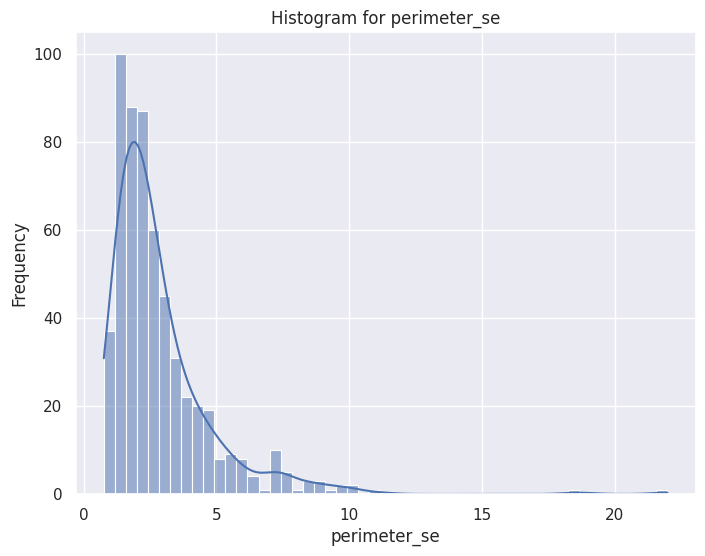

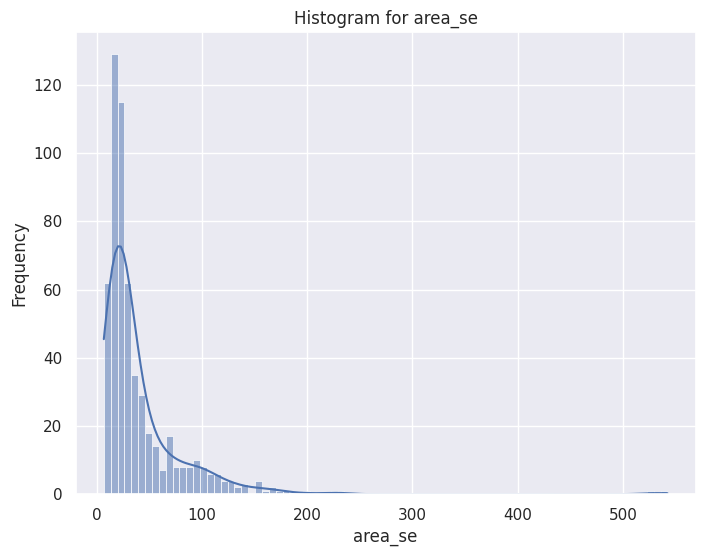

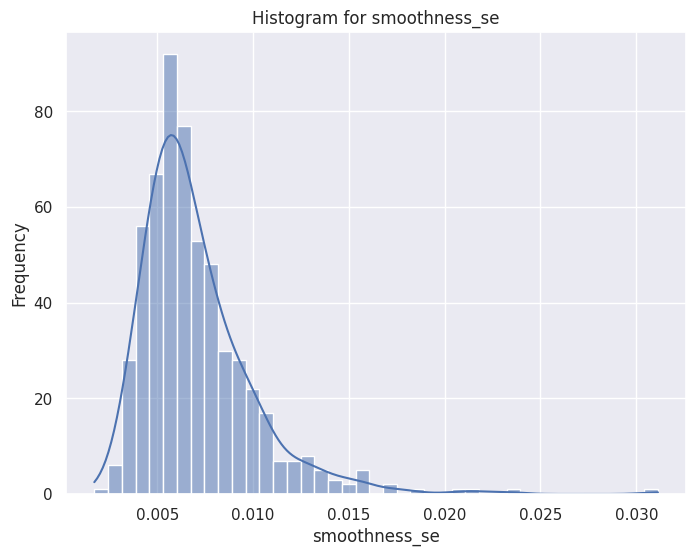

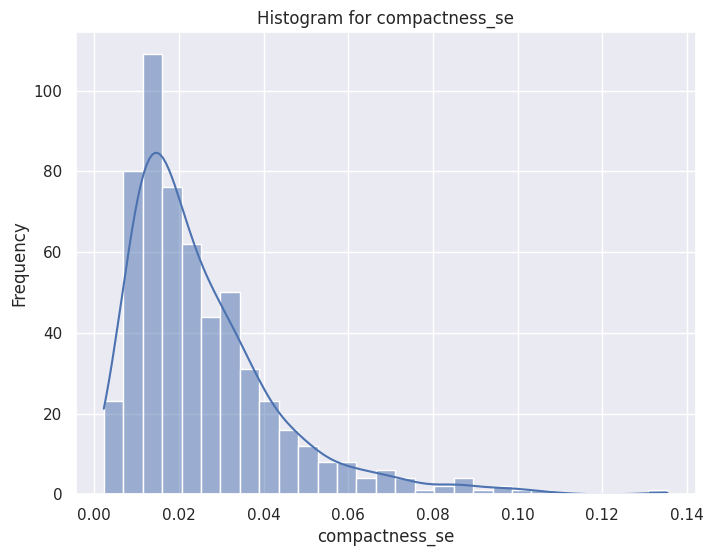

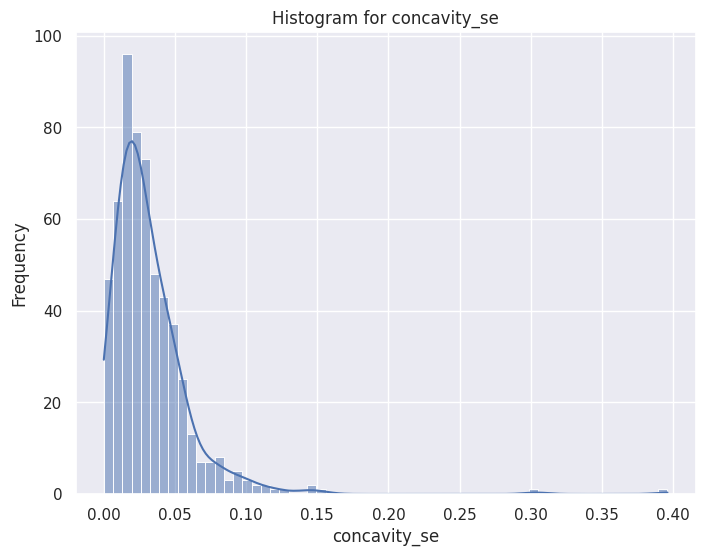

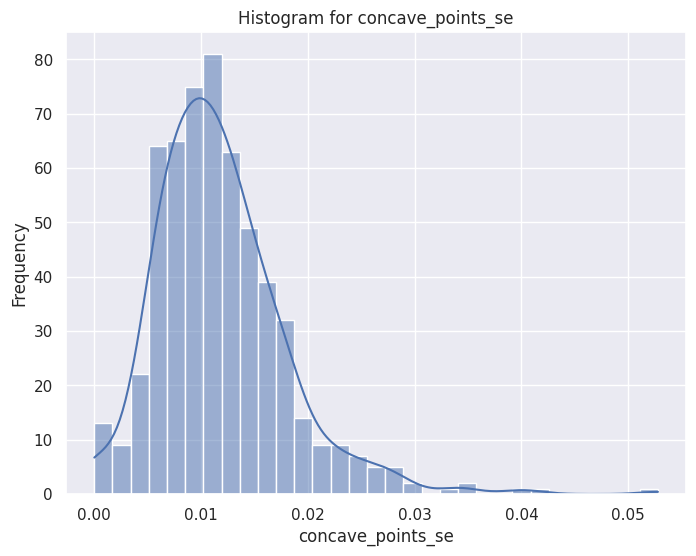

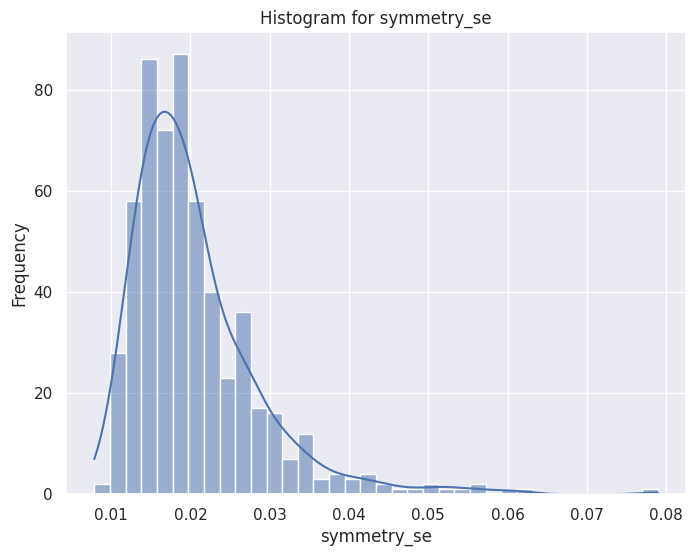

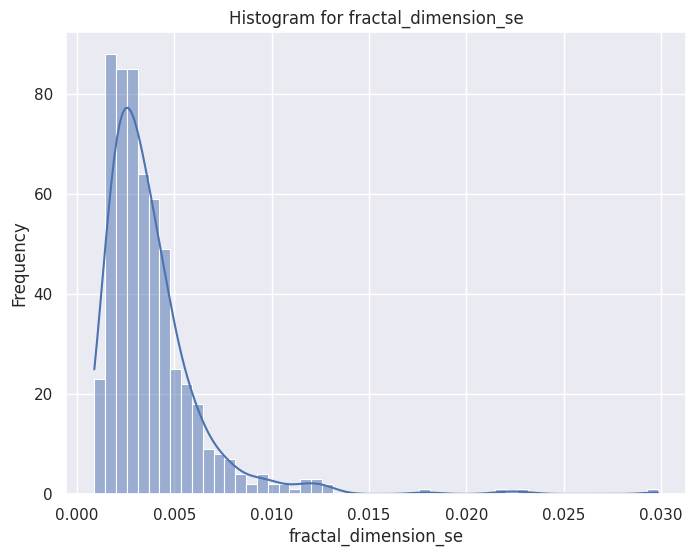

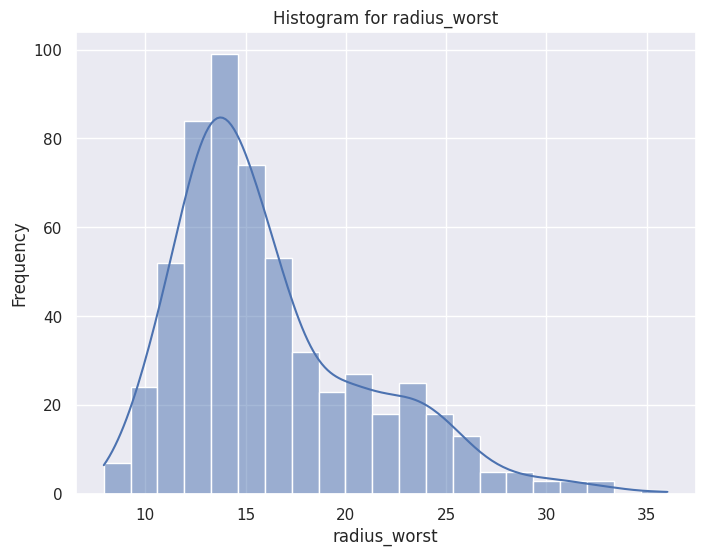

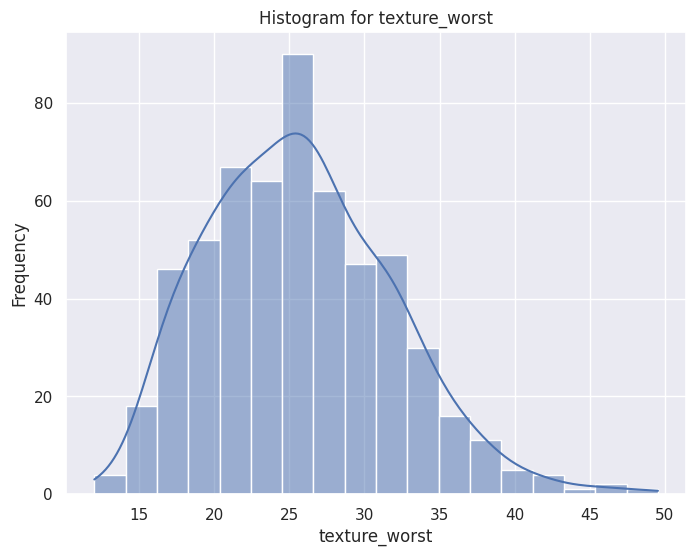

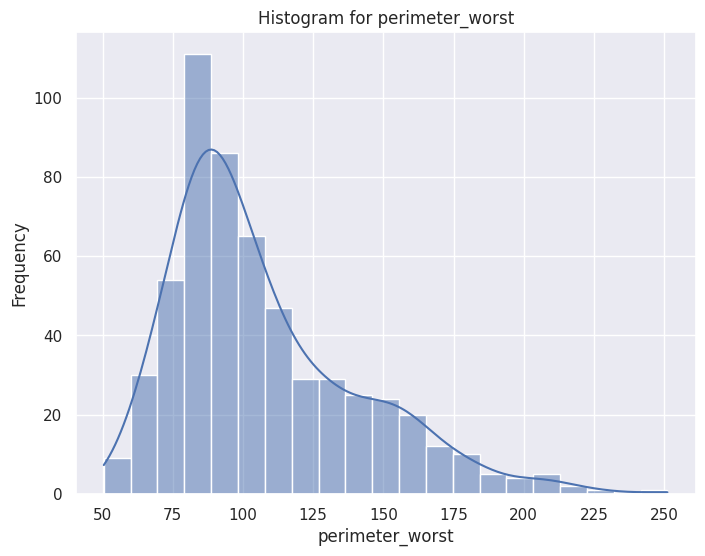

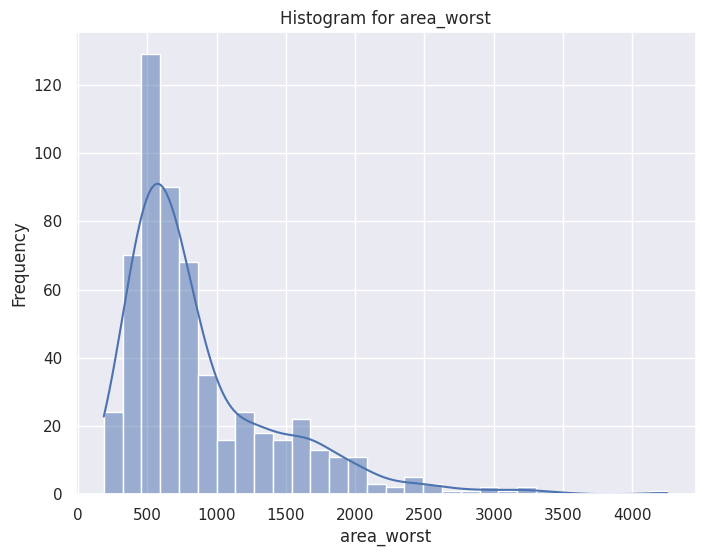

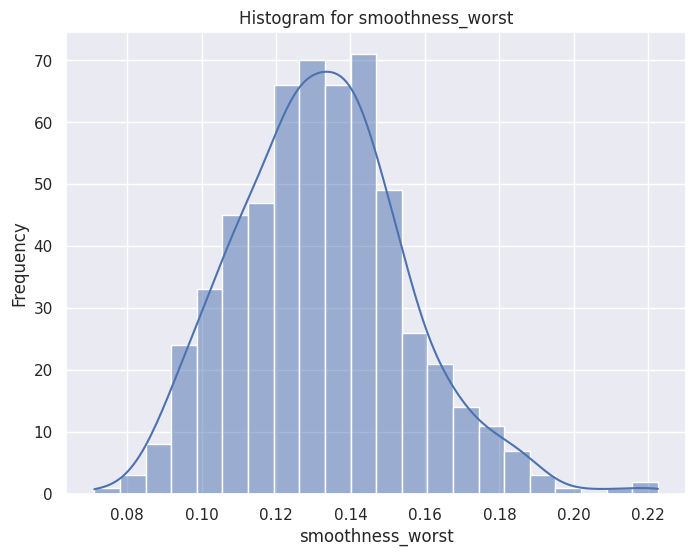

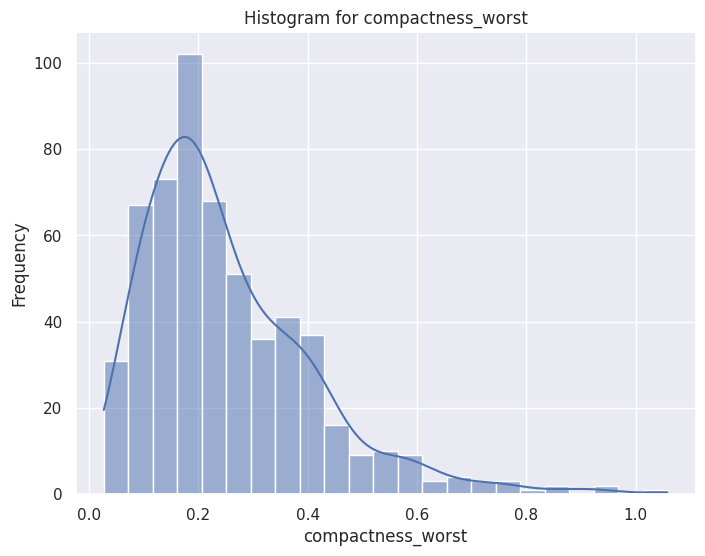

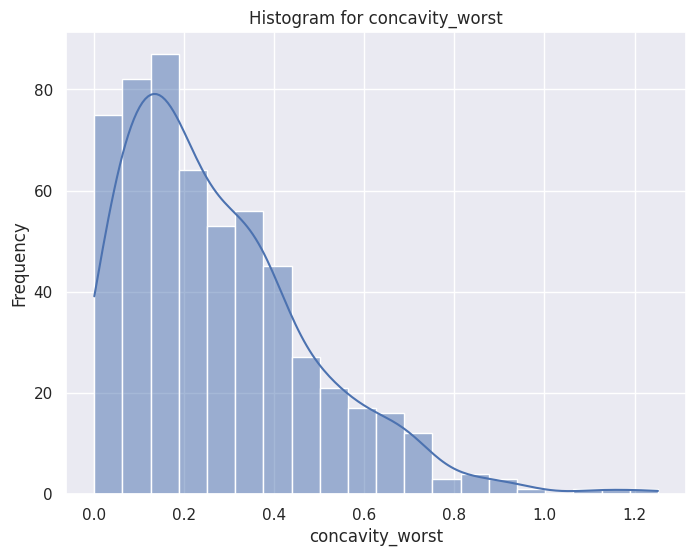

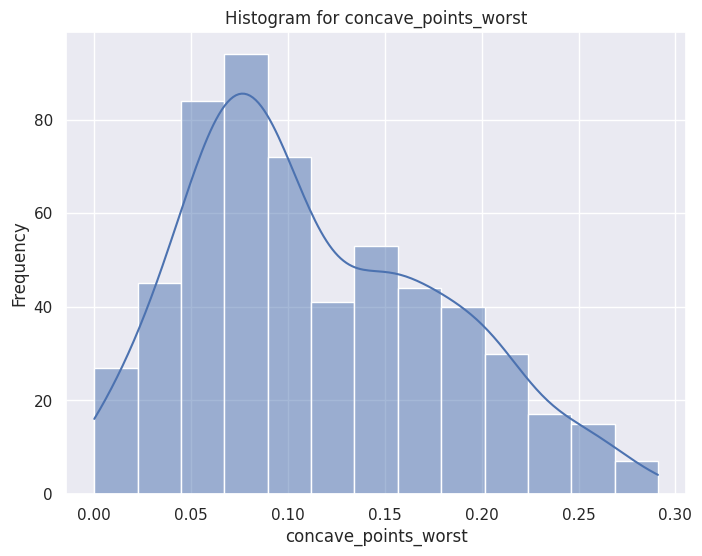

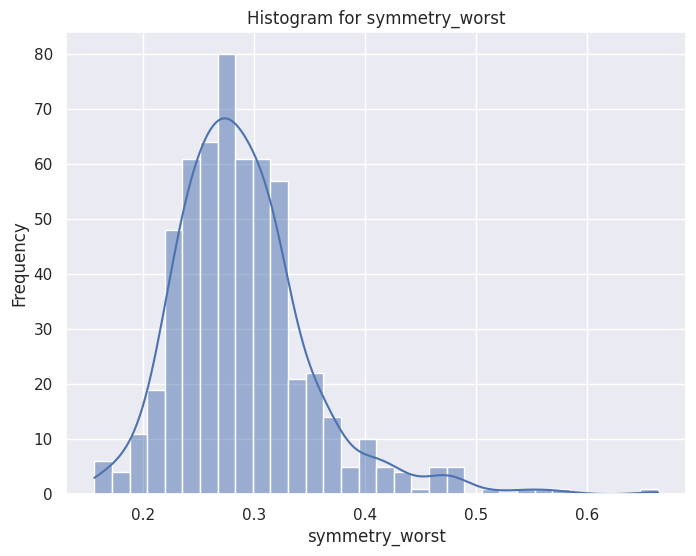

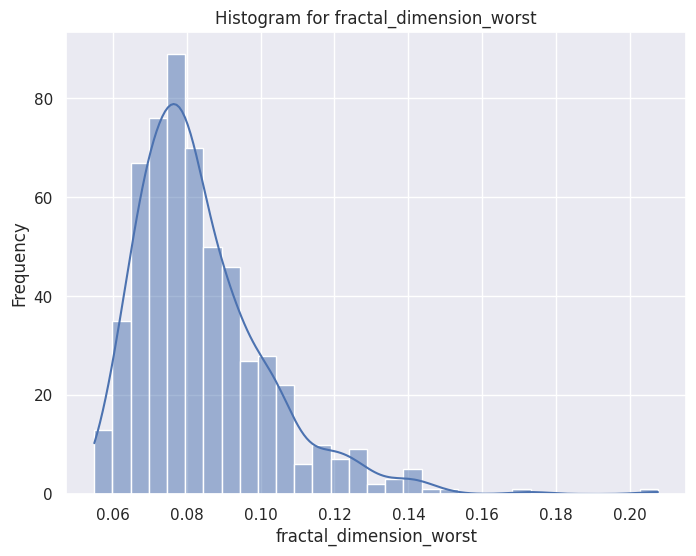

In [ ]:
# Create histograms for each numeric column
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


Unique Values

In [ ]:
# Get the number of unique values for each column
unique_counts = df.nunique()

# Print the results
for column, count in unique_counts.items():
    print(f"Column '{column}' has {count} unique values.")

Column 'id' has 569 unique values.
Column 'diagnosis' has 2 unique values.
Column 'radius_mean' has 456 unique values.
Column 'texture_mean' has 479 unique values.
Column 'perimeter_mean' has 522 unique values.
Column 'area_mean' has 539 unique values.
Column 'smoothness_mean' has 474 unique values.
Column 'compactness_mean' has 537 unique values.
Column 'concavity_mean' has 537 unique values.
Column 'concave_points_mean' has 542 unique values.
Column 'symmetry_mean' has 432 unique values.
Column 'fractal_dimension_mean' has 499 unique values.
Column 'radius_se' has 540 unique values.
Column 'texture_se' has 519 unique values.
Column 'perimeter_se' has 533 unique values.
Column 'area_se' has 528 unique values.
Column 'smoothness_se' has 547 unique values.
Column 'compactness_se' has 541 unique values.
Column 'concavity_se' has 533 unique values.
Column 'concave_points_se' has 507 unique values.
Column 'symmetry_se' has 498 unique values.
Column 'fractal_dimension_se' has 545 unique val

Correlation

<ipython-input-13-d7396846824e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


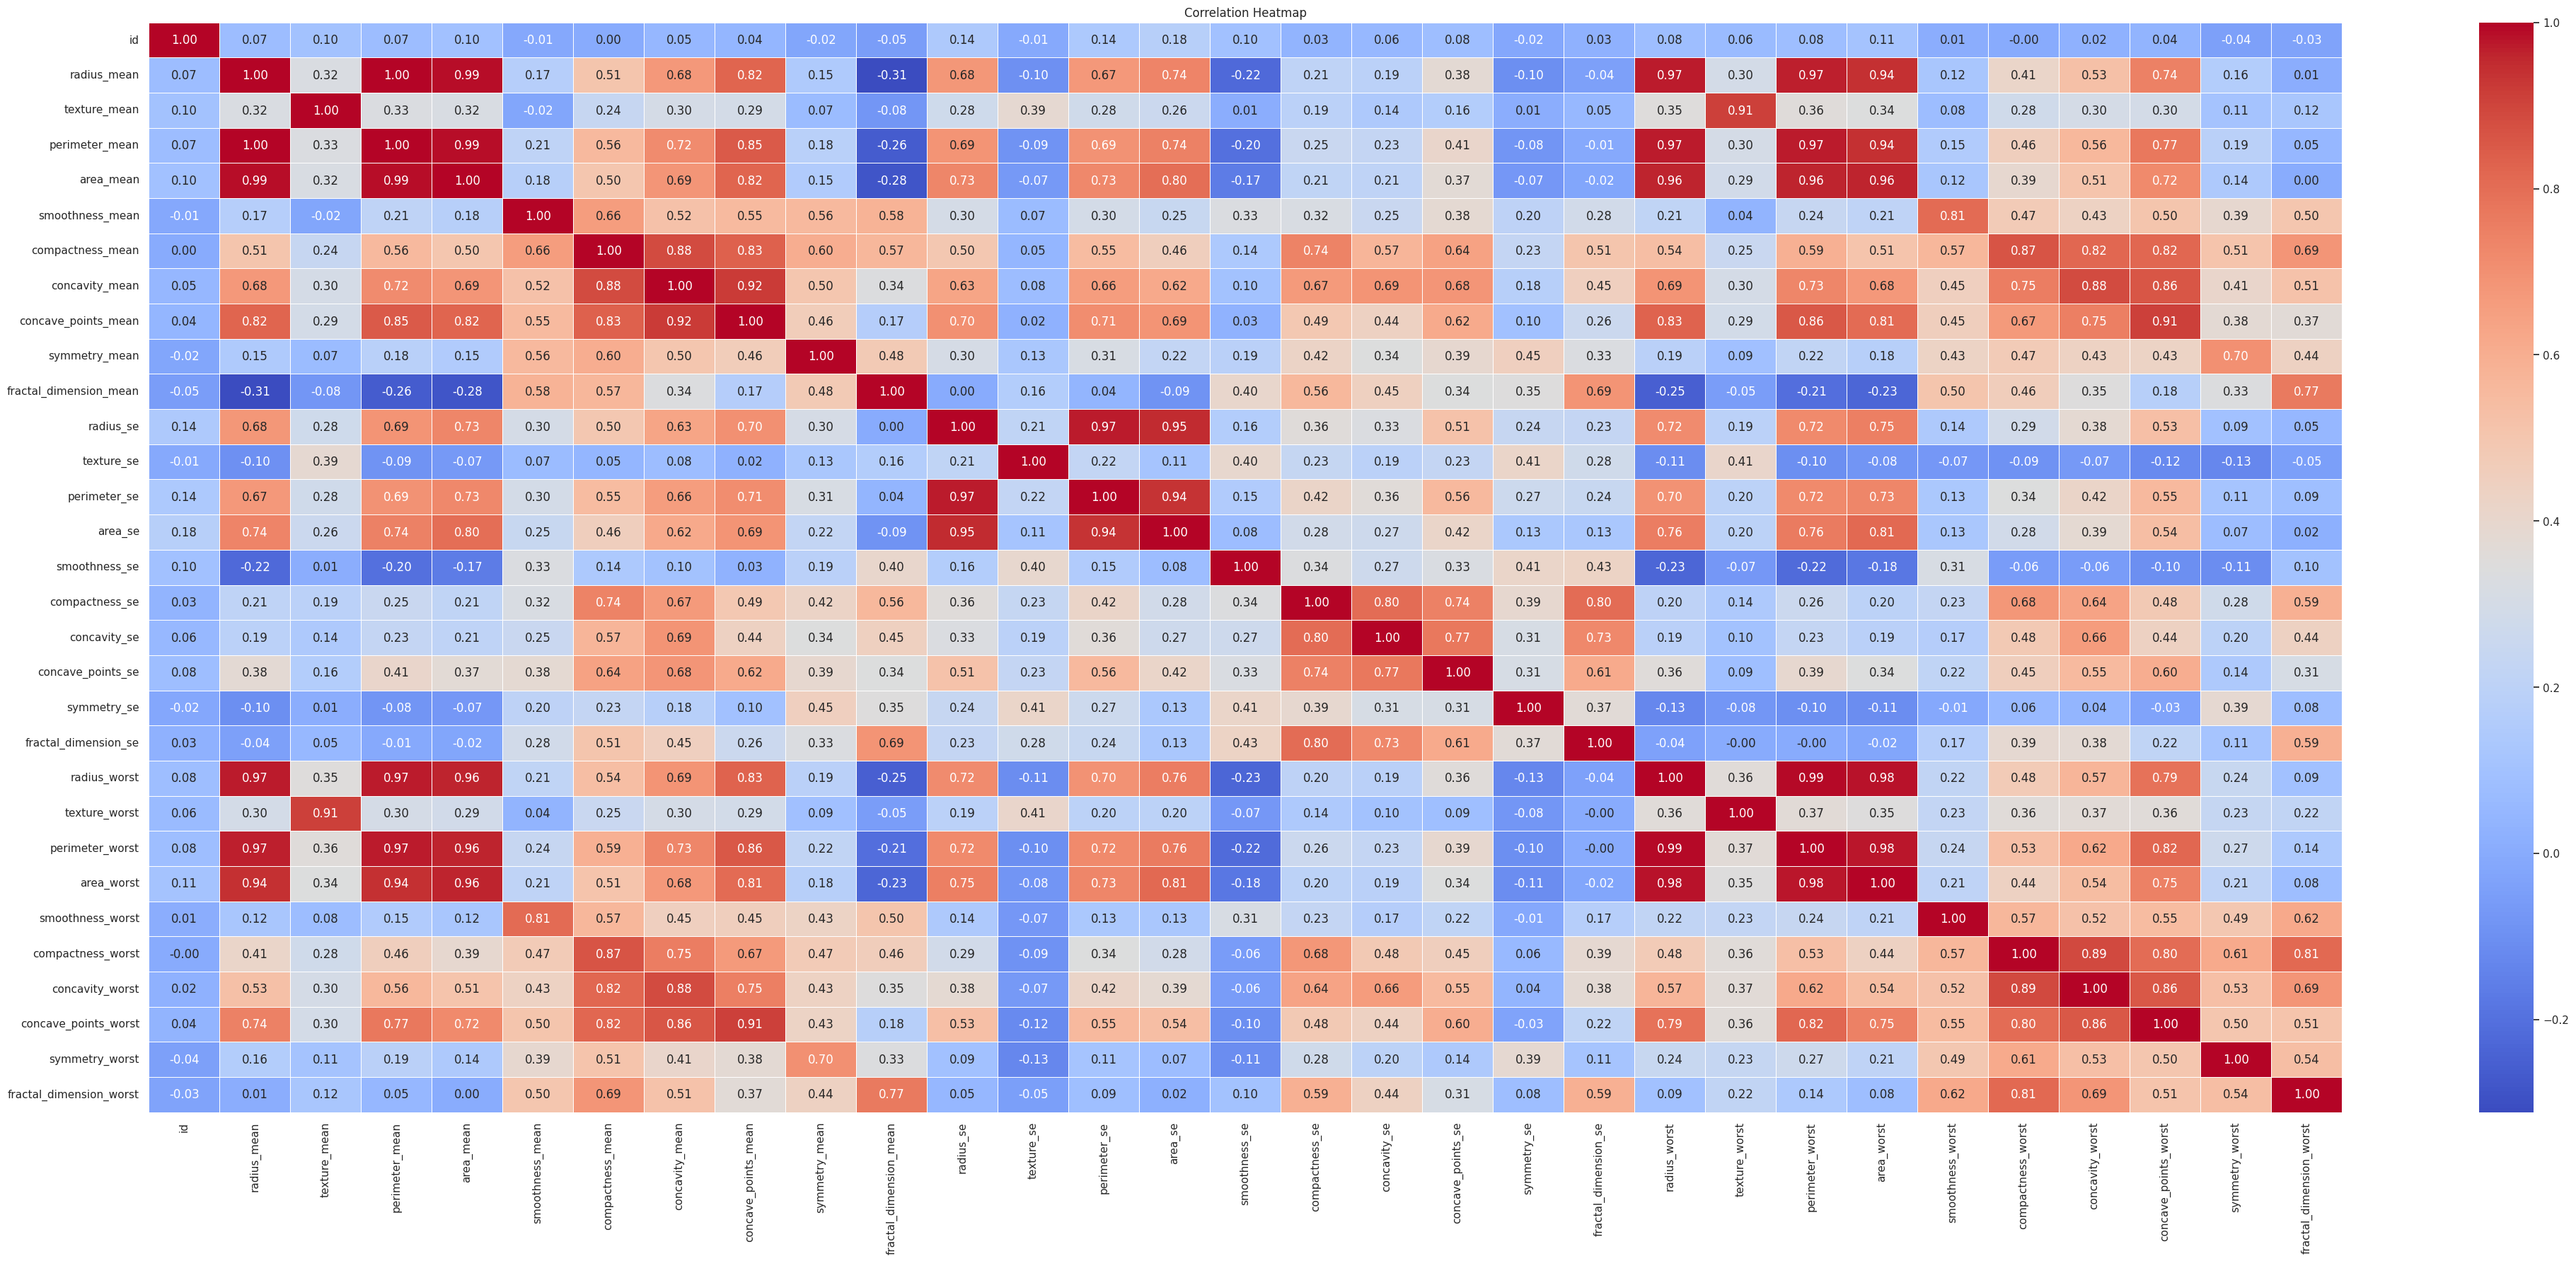

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(50, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


Feature selection using PCA

In [ ]:
X_train = df.drop("diagnosis", axis=1)

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Assume X_train is your training data
# Fit PCA
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)

# Get feature importance from explained variance
feature_importance = pca.explained_variance_ratio_

# Match feature importances with feature names
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Print or visualize feature importances
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

# Alternatively, you can create a DataFrame for better visualization
feature_importance_df = pd.DataFrame(list(feature_importance_dict.items()), columns=['Feature', 'Importance'])
print(feature_importance_df)

id: 0.9999999999714058
radius_mean: 2.8076789337937068e-11
texture_mean: 4.672873223443568e-13
perimeter_mean: 4.3851383874350854e-14
area_mean: 3.4958539298470114e-15
smoothness_mean: 2.527735067361907e-15
compactness_mean: 1.922176122200769e-16
concavity_mean: 1.1584891387541951e-16
concave_points_mean: 2.3494974155485838e-17
symmetry_mean: 9.946761342573067e-18
fractal_dimension_mean: 5.376429742199223e-18
radius_se: 2.020936062408722e-18
texture_se: 4.786084401449272e-19
perimeter_se: 2.0222709500009839e-19
area_se: 1.3826273970098047e-19
smoothness_se: 8.485189775947242e-20
compactness_se: 4.0911675668460396e-20
concavity_se: 2.3925524202837552e-20
concave_points_se: 1.504497584679942e-20
symmetry_se: 1.1803216759799697e-20
fractal_dimension_se: 1.0473452032007267e-20
radius_worst: 4.9778125324135924e-21
texture_worst: 3.685890602815142e-21
perimeter_worst: 2.233373030051602e-21
area_worst: 1.8162862367709823e-21
smoothness_worst: 1.0330272535983272e-21
compactness_worst: 7.990539

In [ ]:
df = df.drop("perimeter_mean", axis=1) #correlation is 1 with radius mean

In [ ]:
# perimeter_worst and area_worst are highly correlated with radius_worst and also these two doesn't have much feature importance
df = df.drop(['perimeter_worst', 'area_worst'], axis=1)

In [ ]:
#very less significant
df = df.drop(['smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'], axis=1)

Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'diagnosis' is the column to be label encoded
le = LabelEncoder()

# Fit and transform the 'diagnosis' column
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Display the mapping between original labels and encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'B': 0, 'M': 1}


Outlier

In [ ]:
# Function to detect outliers using IQR method
def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers

# Iterate through each numeric column
for column in df.select_dtypes(include=np.number).columns:
    # Find outliers using the IQR method
    outliers = find_outliers_iqr(df[column])

    # Print the number of outliers for each column
    print(f"Number of outliers in {column}: {outliers.sum()}")


Number of outliers in id: 81
Number of outliers in radius_mean: 14
Number of outliers in texture_mean: 7
Number of outliers in area_mean: 25
Number of outliers in smoothness_mean: 6
Number of outliers in compactness_mean: 16
Number of outliers in concavity_mean: 18
Number of outliers in concave_points_mean: 10
Number of outliers in symmetry_mean: 15
Number of outliers in fractal_dimension_mean: 15
Number of outliers in radius_se: 38
Number of outliers in texture_se: 20
Number of outliers in perimeter_se: 38
Number of outliers in area_se: 65
Number of outliers in smoothness_se: 30
Number of outliers in compactness_se: 28
Number of outliers in concavity_se: 22
Number of outliers in concave_points_se: 19
Number of outliers in symmetry_se: 27
Number of outliers in fractal_dimension_se: 28
Number of outliers in radius_worst: 17
Number of outliers in texture_worst: 5


In [ ]:
# Get the list of all column names in the DataFrame
columns_to_process = df.columns

# Loop through each column
for column in columns_to_process:
    upper_limit = df[column].quantile(0.97)
    lower_limit = df[column].quantile(0.03)

    df[column] = np.where(df[column] >= upper_limit, upper_limit,
                          np.where(df[column] <= lower_limit, lower_limit, df[column]))


Splitting data

In [ ]:
from sklearn.model_selection import train_test_split
predictors = df.drop('diagnosis',axis=1)
target = df['diagnosis']
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create an SVM model
svm_model = make_pipeline(StandardScaler(), SVC())

# Fit the model on the training data
svm_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = svm_model.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
medae = median_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)

# Print the results
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Median Absolute Error:", medae)
print("Mean Squared Error:", mse)


R2 Score: 0.8913940933629724
Mean Absolute Error: 0.02631578947368421
Median Absolute Error: 0.0
Mean Squared Error: 0.02631578947368421


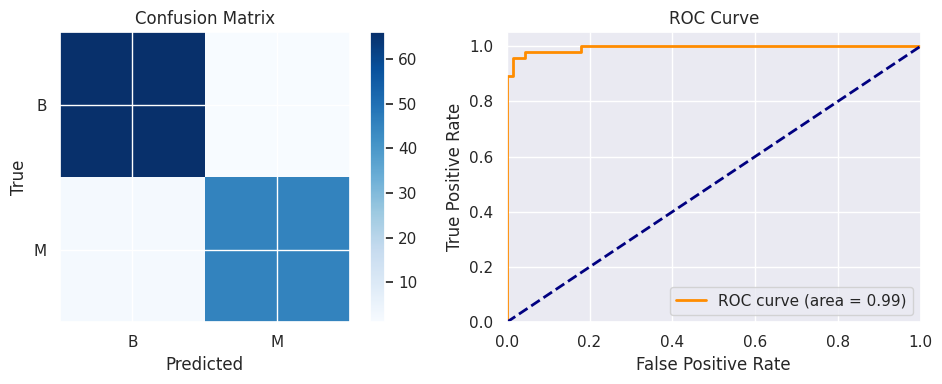

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, svm_model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

# Plot Confusion Matrix
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], labels=['B', 'M'])
plt.yticks([0, 1], labels=['B', 'M'])

# Plot ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


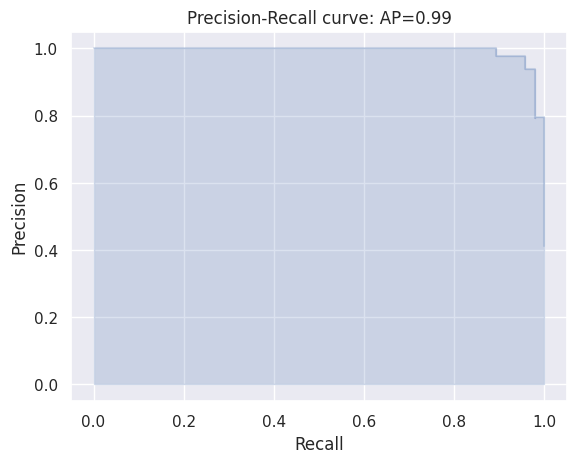

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(Y_test, svm_model.decision_function(X_test))
average_precision = average_precision_score(Y_test, svm_model.decision_function(X_test))

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
classification_rep = classification_report(Y_test, Y_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        67
         1.0       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7))
    sns.distplot(Y_test.values,label='test values', ax=ax1)
    sns.distplot(prediction ,label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(Y_test,prediction, c='orange',label='predictions')
    ax2.plot(Y_test,Y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated diagnosis')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled')

<ipython-input-27-97f3d817bae3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test.values,label='test values', ax=ax1)
<ipython-input-27-97f3d817bae3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prediction ,label='prediction', ax=ax1)


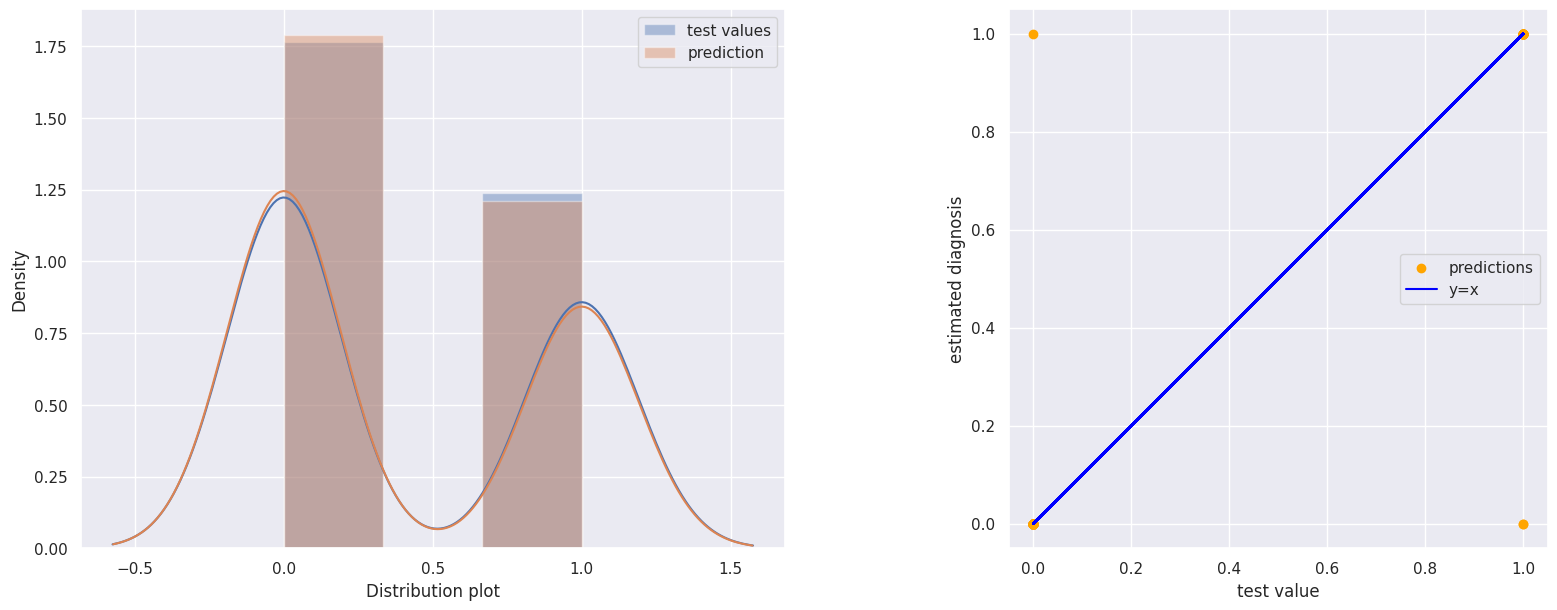

In [ ]:
plot(Y_pred)